In [1]:
%matplotlib inline

In [2]:
import os, glob
for f in glob.glob("*.pyc"): os.remove(f) 
from visualize import *
from model import *

In [3]:
SEC = 2
N = 4

In [4]:
# create_wavs(sec=SEC)
create_spectrograms()
create_ceps_all()

In [5]:
# show_spectrograms('data', 'silent')

In [6]:
# show_spectrograms('data', 'speech')

In [7]:
# show_spectrograms('data', 'noise')

In [8]:
# =================================
# Main
# =================================

In [9]:
# Data Preparation
from sklearn.utils import resample
X, y = read_ceps(LABELS)
X, y = resample(X, y)


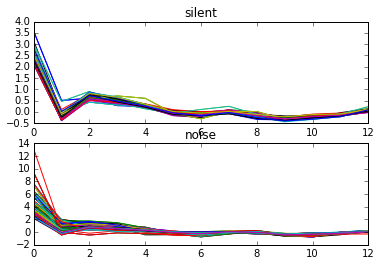

In [10]:
show_mfccs([211, 212, 212], X, y, LABELS)

In [11]:
# Modeling
MODEL = lambda: MODEL_NN()
classifier = MODEL()
classifier


In [12]:
# Training
train(X, y, classifier)

[0 0 0 0 2 0 1 1 0 2 2 2 0 1 1 1 2 2 1 2 2 2 1 0 2 2 0 0 0 2 1 1 2 0 1 0 0
 0 2 1 2 2 0 0 1 2 1 2 2 1 1 2 0 0 0 1 1 1 2 2 1 1 2 0 0 0 0 0 0 1 2 0 2 1
 1 0 0 0 1 0 2 1 2 1 1 1 2 1 0 1 0 2 0 2 0 0 1 1 1 0 2 0 0 1 1 2 2 1 1 2 1
 2 2 1 1 2 1 0 1 2 2 2 1 2 0 1 2 0 2 0 0 0 2 0 0 2 1 1 0 1 1 1 1 0 1 2 1 1
 2 1 1 2 0 2 0 1 0 0 1 0 0 2 1 0 1 2 2 0 0 0 1 0 2 2 1 2 2 1 1 1 0 2 0 0 1
 2 1 0 1 2 1 2 1 1 0 2 1 2 2 0 2 2]
epoch 1
train mean loss=1.59659599314, accuracy=0.391089109206
epoch 2
train mean loss=1.41618235867, accuracy=0.430693071668
epoch 3
train mean loss=1.35889373203, accuracy=0.420792079208
epoch 4
train mean loss=1.06257214405, accuracy=0.564356440365
epoch 5
train mean loss=0.96343853096, accuracy=0.603960407252
epoch 6
train mean loss=1.09406021562, accuracy=0.594059405941
epoch 7
train mean loss=0.894472168224, accuracy=0.678217818241
epoch 8
train mean loss=0.792727889401, accuracy=0.752475246935
epoch 9
train mean loss=0.922984834945, accuracy=0.673267327913
epoch 10
train mean

In [13]:
# Evaluation(Test) and Visualization
# map(classifier.predict, [ x.reshape(1, -1) for x in X] )
result = cross_validate(X, y, N, MODEL)
result

('TRAIN:', array([ 51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180,
       181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193,
       194, 195, 196, 197, 198, 199, 200, 201]), 'TEST:', array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 3

AttributeError: 'Chain' object has no attribute 'predict'

In [ ]:
cms = [ cm for err, cm in result ]
for i in range(N):
    print[cms[i]]
    show_confusion_matrix(cms[i], LABELS)

In [ ]:
# Classify or Prediction

def movefile(path, label):
    parent = os.path.dirname(path)
    base = os.path.basename(path)
    output_path = os.path.join(parent, label, base)
    os.rename(path, output_path)    
    
def assign(classifier, directory):
    for path in glob.glob(os.path.join(directory, "*_part_*.wav")):
        ceps = read_as_mfcc(path)
        feature = np.mean(trim_ceps(ceps), axis=0)
        label = classifier.predict(feature.reshape(1, -1))[0]
        print(label)
        movefile(path, label)

In [ ]:
TARGET_DIR = './data/target'
divide_wav(os.path.join(TARGET_DIR, "target.wav"), sec=SEC)

In [ ]:
assign(classifier, TARGET_DIR)